# Pytorch MNIST LeNet5 Demo

In [0]:
## Import necessary packages
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import time

import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [0]:
# Set the batch size for gradients update and number of training epochs. Feel free to change these and check the results

BATCH_SIZE = 128
NUM_EPOCHS = 10

First, we need to load the mnist data, preprocess them, and encapsulate them into a *dataloader*. 

In [0]:
# preprocessing
normalize = transforms.Normalize(mean=[.5], std=[.5])
transform = transforms.Compose([transforms.ToTensor(), normalize])

# download and load the data
train_dataset = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./mnist/', train=False, transform=transform, download=False)

# encapsulate into a dataloader
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


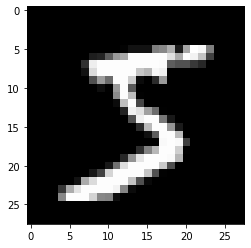

In [0]:
# visualize a sample from the training set
idx=0
plt.imshow(train_dataset.train_data[idx,:,:].numpy(), cmap='gray')

Then, we need to define the neural network, the loss function, and the optimizer.  

The following is an implemention of the classic LeNet5 model. Refer to this [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). Here is architecture (Figure 2 in the paper)
![The network architecture](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

In [0]:
class LeNet(nn.Module):
# implement the model according to the paper above

  
  def __init__(self):
    '''
      Initialize the network

    '''
    super(LeNet, self).__init__()
    # Feature extraction 
    # Convolution layer that takes 1 input image layer and connects to 6 
    # feature maps 
    self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
    self.pool = nn.MaxPool2d(2,2) 
    self.conv2 = nn.Conv2d(6,16,5)
    # Classifier
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
      
  # Forward-Propagation
  def forward(self, x): 
    x = self.pool(nn.functional.relu(self.conv1(x)))
    x = self.pool(nn.functional.relu(self.conv2(x)))
    x = x.view(-1, np.prod(x.size()[1:]))
    x = nn.functional.relu(self.fc1(x))
    x = nn.functional.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# Create a new instance of the LeNet 
model = LeNet()

# Your task: define the loss function and optimizer  
criterion = nn.CrossEntropyLoss()
# Stocastic Gradient Descent 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

# Display the LeNet Version 5 model    
print(model)


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


With the defined model, now you can train and evaluate it! Try to finish the code block below to do implement the training stage and report the accuracy of your model.

In [0]:
running_loss = 0.0
k = 0
# Train and evaluate
for epoch in range(NUM_EPOCHS):
  for images, labels in tqdm(train_loader):
    # Your task: implement forward & backward propagation
    
    # Set the gradients initially to zero
    optimizer.zero_grad()

    # Pass the training image into the model and get its output
    output = model(images)

    # Get the cost based on the output and the corresponding label
    cost = criterion(output, labels)

    # 
    cost.backward()

    # Perform a step in the SGD 
    optimizer.step()

    # Print averaged loss per minibatch every 100 mini-batches
    # Compute and print statistics
    with torch.no_grad():
      running_loss += cost.item()
    if k % 100 == 99:
      print('[%d, %5d] loss: %.3f' %
            (epoch + 1, k + 1, running_loss / 100))
      running_loss = 0.0
    k += 1
        
        
    # evaluate
    # Your task: calculate the accuracy on both the traning and testing dataset

 22%|██▏       | 102/468 [00:05<00:18, 19.73it/s]

[1,   100] loss: 2.301


 44%|████▎     | 204/468 [00:10<00:13, 19.54it/s]

[1,   200] loss: 2.297


 65%|██████▍   | 303/468 [00:15<00:08, 19.86it/s]

[1,   300] loss: 2.291


 86%|████████▌ | 402/468 [00:21<00:03, 19.82it/s]

[1,   400] loss: 2.282


  7%|▋         | 34/468 [00:01<00:22, 19.20it/s]

[2,   500] loss: 2.264


 29%|██▊       | 134/468 [00:06<00:17, 18.88it/s]

[2,   600] loss: 2.222


 50%|█████     | 236/468 [00:12<00:11, 19.35it/s]

[2,   700] loss: 2.074


 71%|███████▏  | 334/468 [00:17<00:06, 19.19it/s]

[2,   800] loss: 1.497


 93%|█████████▎| 435/468 [00:22<00:01, 19.77it/s]

[2,   900] loss: 0.812


 14%|█▍        | 66/468 [00:03<00:20, 19.53it/s]

[3,  1000] loss: 0.562


 35%|███▌      | 165/468 [00:08<00:15, 19.17it/s]

[3,  1100] loss: 0.441


 57%|█████▋    | 266/468 [00:13<00:10, 19.62it/s]

[3,  1200] loss: 0.402


 78%|███████▊  | 367/468 [00:19<00:05, 18.88it/s]

[3,  1300] loss: 0.349


100%|█████████▉| 466/468 [00:24<00:00, 18.92it/s]

[3,  1400] loss: 0.316


 21%|██        | 98/468 [00:05<00:19, 19.12it/s]

[4,  1500] loss: 0.290


 42%|████▏     | 198/468 [00:10<00:13, 19.46it/s]

[4,  1600] loss: 0.267


 64%|██████▍   | 299/468 [00:15<00:09, 18.72it/s]

[4,  1700] loss: 0.245


 85%|████████▌ | 398/468 [00:20<00:03, 19.48it/s]

[4,  1800] loss: 0.234


  7%|▋         | 31/468 [00:01<00:23, 18.89it/s]

[5,  1900] loss: 0.204


 28%|██▊       | 130/468 [00:06<00:17, 19.21it/s]

[5,  2000] loss: 0.209


 49%|████▉     | 230/468 [00:11<00:12, 18.93it/s]

[5,  2100] loss: 0.192


 71%|███████   | 331/468 [00:17<00:07, 19.27it/s]

[5,  2200] loss: 0.180


 92%|█████████▏| 431/468 [00:22<00:01, 19.56it/s]

[5,  2300] loss: 0.176


 13%|█▎        | 62/468 [00:03<00:20, 20.07it/s]

[6,  2400] loss: 0.163


 35%|███▌      | 164/468 [00:08<00:14, 20.29it/s]

[6,  2500] loss: 0.168


 56%|█████▌    | 262/468 [00:13<00:10, 20.22it/s]

[6,  2600] loss: 0.148


 78%|███████▊  | 364/468 [00:18<00:05, 20.35it/s]

[6,  2700] loss: 0.149


 99%|█████████▉| 463/468 [00:23<00:00, 20.11it/s]

[6,  2800] loss: 0.144


 20%|█▉        | 93/468 [00:04<00:18, 20.00it/s]

[7,  2900] loss: 0.137


 41%|████▏     | 194/468 [00:09<00:13, 20.20it/s]

[7,  3000] loss: 0.133


 63%|██████▎   | 295/468 [00:14<00:08, 20.16it/s]

[7,  3100] loss: 0.129


 84%|████████▍ | 394/468 [00:19<00:03, 19.14it/s]

[7,  3200] loss: 0.132


  6%|▌         | 27/468 [00:01<00:22, 19.87it/s]

[8,  3300] loss: 0.120


 27%|██▋       | 127/468 [00:06<00:17, 19.56it/s]

[8,  3400] loss: 0.120


 49%|████▊     | 227/468 [00:11<00:12, 19.96it/s]

[8,  3500] loss: 0.118


 70%|██████▉   | 327/468 [00:16<00:07, 19.32it/s]

[8,  3600] loss: 0.122


 91%|█████████ | 427/468 [00:21<00:02, 19.02it/s]

[8,  3700] loss: 0.109


 12%|█▏        | 58/468 [00:02<00:21, 19.44it/s]

[9,  3800] loss: 0.117


 34%|███▍      | 158/468 [00:08<00:15, 19.47it/s]

[9,  3900] loss: 0.110


 55%|█████▌    | 259/468 [00:13<00:10, 20.08it/s]

[9,  4000] loss: 0.099


 76%|███████▋  | 358/468 [00:18<00:05, 19.71it/s]

[9,  4100] loss: 0.105


 98%|█████████▊| 459/468 [00:23<00:00, 19.07it/s]

[9,  4200] loss: 0.101


 19%|█▉        | 91/468 [00:04<00:19, 19.46it/s]

[10,  4300] loss: 0.099


 41%|████      | 191/468 [00:09<00:14, 19.61it/s]

[10,  4400] loss: 0.093


 62%|██████▏   | 291/468 [00:14<00:08, 19.90it/s]

[10,  4500] loss: 0.091


 84%|████████▎ | 391/468 [00:19<00:03, 19.28it/s]

[10,  4600] loss: 0.095


100%|██████████| 468/468 [00:23<00:00, 19.61it/s]


In [0]:
model.eval()

# Initialize the number of correct labels 
num_correct = 0

# Initialize the average cost 
avg_cost = 0.0

# Iterate through the input images and their corresponding labels in the test 
# dataset
for images, labels in tqdm(test_loader):
  # Run image through the LeNet-5 model and collect its output
  output = model(images)

  # sum the cost given the output and the corresponding label
  avg_cost += criterion(output, labels).sum()

  # Store the prediction 
  pred = output.detach().max(1)[1]

  # If prediction matches the label increment num_correct
  num_correct += pred.eq(labels.view_as(pred)).sum()

# Divide the overall sum cost by the length of the test dataset for the average
avg_cost /= len(test_dataset)

# Display the test average cost and accuracy
print('Test Avg. Loss: %f, Accuracy: %f' % (avg_cost.detach().cpu().item(), 
                                        float(num_correct) / len(test_dataset)))


100%|██████████| 78/78 [00:02<00:00, 27.00it/s]

Test Avg. Loss: 0.000621, Accuracy: 0.972800
